## الف) EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**خواندن داده‌ها**

In [2]:
data = pd.read_csv('Datasets/Income.csv')
data

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


**بررسی اطلاعات اولیه داده‌ها**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


**تحلیل آماری ویژگی‌ها**

In [4]:
data.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


**بررسی همبستگی**

In [5]:
data.corr()

,age,experience,income
age,1.000000,0.615165,0.532204
experience,0.615165,1.000000,0.984227
income,0.532204,0.984227,1.000000


**رسم نمودارهای توزیع**

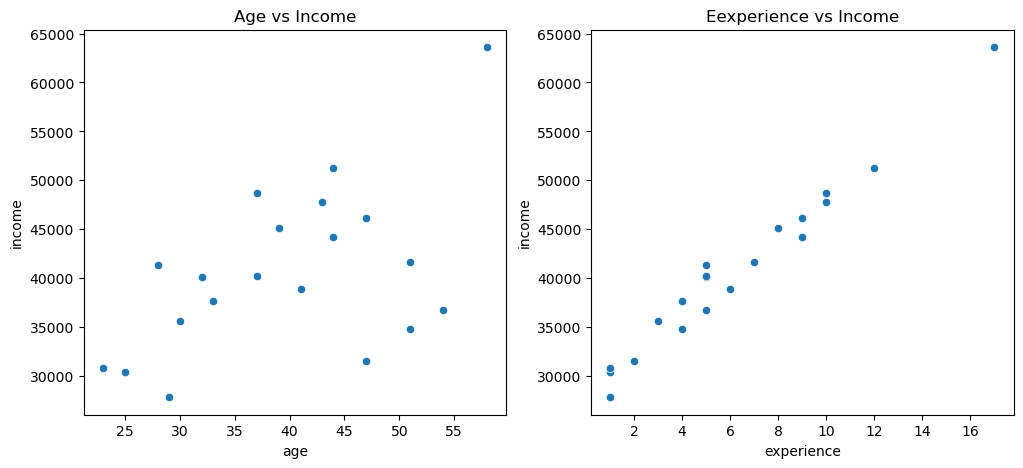

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['age'], y=data['income'])
plt.title('Age vs Income')

plt.subplot(1, 2, 2)
sns.scatterplot(x=data['experience'], y=data['income'])
plt.title('Eexperience vs Income')
plt.show()

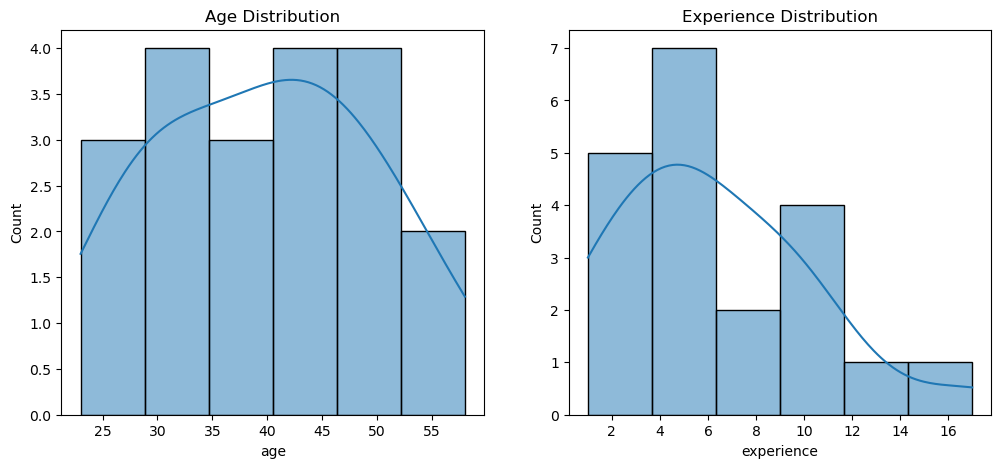

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['experience'], kde=True)
plt.title('Experience Distribution')
plt.show()

## ب) پیش پردازش

### ۱. نرمال‌سازی (Normalization)

نرمال‌سازی به معنای مقیاس‌گذاری داده‌ها به یک محدوده مشخص است، معمولاً بین ۰ و ۱. این کار برای ویژگی‌هایی مناسب است که توزیع آن‌ها یکنواخت یا نزدیک به یکنواخت است و مقادیر به شکل نسبی باید با یکدیگر مقایسه شوند. فرمول نرمال‌سازی به صورت زیر است:

$$
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

In [8]:
normalized_data = data.copy()

for column in data.columns[:-1]:
    min_val = data[column].min()
    max_val = data[column].max()
    normalized_data[column] = (data[column] - min_val) / (max_val - min_val)

normalized_data

,age,experience,income
0,0.057143,0.0000,30450
1,0.200000,0.1250,35670
2,0.685714,0.0625,31580
3,0.257143,0.2500,40130
4,0.571429,0.5625,47830
5,0.800000,0.3750,41630
6,0.142857,0.2500,41340
7,0.285714,0.1875,37650
8,0.400000,0.2500,40250
9,0.457143,0.4375,45150


### ۲. استانداردسازی (Standardization)

استانداردسازی داده‌ها را به میانگین صفر و انحراف معیار یک می‌برد. این روش زمانی مناسب است که ویژگی‌ها توزیع نرمال (گاوسی) دارند و مدل باید تأثیرات برابری از تمامی ویژگی‌ها دریافت کند. فرمول استانداردسازی به صورت زیر است:

$$
x_{\text{std}} = \frac{x - \mu}{\sigma}
$$

In [9]:
standardized_data = data.copy()

for column in data.columns[:-1]:
    mean_val = data[column].mean()
    std_val = data[column].std()
    standardized_data[column] = (data[column] - mean_val) / std_val

standardized_data

,age,experience,income
0,-1.460950,-1.260795,30450
1,-0.962332,-0.775874,35670
2,0.732968,-1.018334,31580
3,-0.762885,-0.290953,40130
4,0.334074,0.921350,47830
5,1.131862,0.193968,41630
6,-1.161779,-0.290953,41340
7,-0.663161,-0.533413,37650
8,-0.264267,-0.290953,40250
9,-0.064820,0.436429,45150


## ج) پیاده سازی

### ج.۱)

In [10]:
X = normalized_data[['age', 'experience']].values
y = normalized_data['income'].values

X[0]

array([0.05714286, 0.        ])

**تعریف تابع فرضیه**
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

In [11]:
X = np.c_[np.ones(X.shape[0]), X]
X[0]

array([1.        , 0.05714286, 0.        ])

**به‌روزرسانی وزن‌ها با گرادیان کاهشی**
$$
\theta := \theta - \alpha \nabla_\theta \text{MSE} = \theta_j - \alpha \frac{2}{n} X^T (X \theta - \vec{y})
$$

In [12]:
theta = np.zeros(X.shape[1])
lr = 0.001
epochs = 1000000

for epoch in range(epochs):
    predictions = X.dot(theta)
    errors = predictions - y
    gradients = (2 / len(y)) * X.T.dot(errors)
    theta -= lr * gradients

**تابع هزینه MSE**
$$
\text{MSE} = \frac{1}{n} (X \theta - \vec{y})^T (X \theta - \vec{y})
$$

In [13]:
def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    mse = (1 / len(y)) * errors.T.dot(errors)
    return mse

In [14]:
print("MSE:", compute_mse(X, y, theta))

MSE: 1533633.9787141816


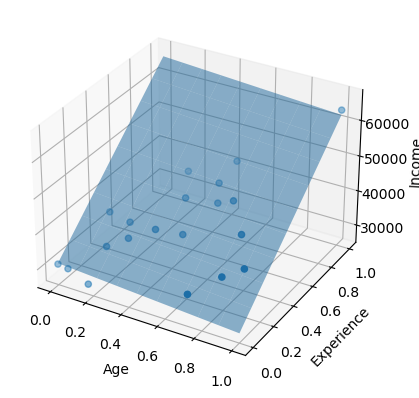

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[:, 1], X[:, 2], y)
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')

x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
z_surf = theta[0] + theta[1] * x_surf + theta[2] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)
plt.show()

### ج.۲)

**فرمول معادلات نرمال**
$$
\theta = (X^T X)^{-1} X^T \vec{y}
$$

In [16]:
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

predictions = X.dot(theta_normal)

print("MSE:", compute_mse(X, y, theta_normal))

MSE: 1533633.9787141804


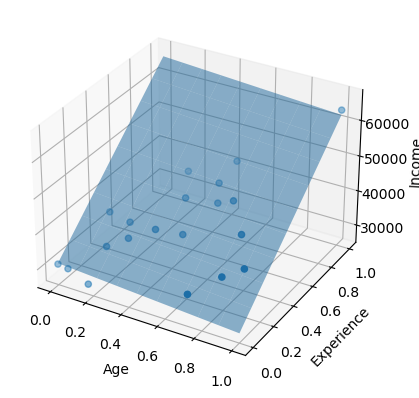

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[:, 1], X[:, 2], y)
ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Income')

x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
z_surf = theta_normal[0] + theta_normal[1] * x_surf + theta_normal[2] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)
plt.show()